In [1]:
from scipy import stats
srcc = stats.spearmanr( [5,8,-1,2], [6,1,9,3])
srcc[0]

-0.7999999999999999

In [2]:
%cd ..


c:\OTHER\ترم 3\پایاننامه\proposal\knowledge distillation\CKDN_code


In [3]:
import predict_one_image



In [4]:
iqa = predict_one_image.IQA_CKDN()

In [5]:
iqa.predict(restored_addr="images1/restored/3.png" , degraded_addr= "images1/degraded/3.png")

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


0.34153816

In [6]:
dte = iqa.get_DTE_features("images1/restored/3.png")

In [7]:
dte[0].shape

(256,)

## correlation or cosine distance

In [8]:
from scipy import stats
import numpy as np
from scipy.spatial.distance import cosine


r = "S5/test/r.BMP"
d = "S5/test/i04_10_1.bmp"


rr = iqa.get_DTE_features(r)[0]
dd = iqa.get_DTE_features(d)[0]

srcc = stats.spearmanr( rr , dd)
srcc[0] , cosine(rr, dd)

(0.999831912336919, 2.3543834686279297e-05)

In [9]:
import glob
TID_ADDR = "C:\OTHER\\term2\seminars\papers\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\datasets\TID2013"
dsts = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24"]


def get_images_dst(dst_type):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*_'+ dst_type +'_'+ '*' +'.*')
    return imgs

def get_mos_dst(dst_type ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1].split('_')[1] == dst_type:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


refs = glob.glob(TID_ADDR+'/reference_images/*')

refs_for_dst = []

for elem in refs:
    for i in range(5):
        refs_for_dst.append(elem)

In [10]:
len(get_images_dst(dsts[7])) , len(refs_for_dst) , len(get_mos_dst(dsts[7]))

(125, 125, 125)

In [11]:
get_images_dst(dsts[7])[107]

'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/distorted_images\\i22_08_3.bmp'

In [12]:
refs_for_dst[107]

'C:\\OTHER\\term2\\seminars\\papers\\Mengyang2019\\bosse2017 varianced_patches\\test_varianced_and_random_patch_method\\datasets\\TID2013/reference_images\\I22.BMP'

In [13]:
get_mos_dst(dsts[7])[107]

3.783

## compare mos and  cosine distance between dte on ref and dst

In [14]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('SRCC_on_DTE-cosine_and_mos.xlsx')
worksheet = workbook.add_worksheet()

In [30]:
row = 3


for c in dsts:
    imgs = get_images_dst(c)
    refs = refs_for_dst
    cosines = []
    moses = get_mos_dst(c)
    for i in range(len(imgs)):
        rr = iqa.get_DTE_features(refs[i])[0]
        dd = iqa.get_DTE_features(imgs[i])[0]
        
        cosines.append(cosine( rr , dd))

    worksheet.write(row, 3,  c)
    worksheet.write(row, 4,  stats.spearmanr( cosines , moses)[0])

    
    print(row)
    row +=1

workbook.close()      

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


## mos on all imgs

In [14]:
imgs = []
refs = []
moses = []
for c in dsts:
    imgs += get_images_dst(c)
    refs += refs_for_dst
    moses += get_mos_dst(c)

In [ ]:
cosines = []
for i in range(len(imgs)):
    rr = iqa.get_DTE_features(refs[i])[0]
    dd = iqa.get_DTE_features(imgs[i])[0]
    
    cosines.append(cosine( rr , dd))







In [ ]:
len(cosines) , len(moses)

(3000, 3000)

In [44]:
stats.spearmanr( cosines , moses)[0]

-0.5838249518164332

## on contents

In [16]:
contents = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24","25"]


def get_images_content(im_name):
    imgs = glob.glob(TID_ADDR+'/distorted_images/*'+im_name+'_'+ '*' +'_'+ '*' +'.*')
    return imgs

def get_mos_content(im_name ):
    mos = []
    f = open(TID_ADDR+"/mos_with_names.txt", "r")
    lines = f.readlines()
    for l in lines:
        if l.split(' ')[1][1:3] == im_name:
            mos.append(float(l.split(' ')[0][:5]))

    return mos


def get_refs_content(content):
        return glob.glob(TID_ADDR+'/reference_images/*'+content+'*') * 120

In [49]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('SRCC_on_DTE-cosine_and_mos-content.xlsx')
worksheet = workbook.add_worksheet()

In [50]:
row = 3


for c in contents:
    imgs = get_images_content(c)
    refs = get_refs_content(c)
    cosines = []
    moses = get_mos_content(c)
    for i in range(len(imgs)):
        rr = iqa.get_DTE_features(refs[i])[0]
        dd = iqa.get_DTE_features(imgs[i])[0]
        
        cosines.append(cosine( rr , dd))

    worksheet.write(row, 3,  c)
    worksheet.write(row, 4,  stats.spearmanr( cosines , moses)[0])

    
    print(row)
    row +=1

workbook.close() 

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


## on all imgs:

In [54]:
imgs = []
refs = []
moses = []
for c in contents:
    imgs += get_images_content(c)
    refs += get_refs_content(c)
    moses += get_mos_content(c)

In [55]:
cosines = []
for i in range(len(imgs)):
    rr = iqa.get_DTE_features(refs[i])[0]
    dd = iqa.get_DTE_features(imgs[i])[0]
    
    cosines.append(cosine( rr , dd))



c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [56]:
len(cosines) , len(moses)

(3000, 3000)

In [57]:
stats.spearmanr( cosines , moses)[0]

-0.5838249518164332

## (distance(img , ref)) / (distance(img , other_ref))

In [17]:

contents = ["01","02","03","04","05","06","07","08","09" , "10", "11", "12", "13", "14", "15", "16", "17", "18", "19","20","21","22","23","24","25"]


In [26]:
import xlsxwriter
 
workbook = xlsxwriter.Workbook('cosine_on_DTE_features_devide_by_diffrent_ref01.xlsx')
worksheet = workbook.add_worksheet()

In [27]:
import random
random.sample(contents, 1)[0]

'03'

In [28]:
row = 3

for c in contents:
    rand_ref = random.sample(contents, 1)[0]
    while rand_ref == c:
       rand_ref = random.sample(contents, 1)[0]
     
    imgs = get_images_content(c)
    refs = get_refs_content(c)
    other_refs = get_refs_content(rand_ref)
    for i in range(len(imgs)):
        dd = iqa.get_DTE_features(imgs[i])[0]
        rr = iqa.get_DTE_features(refs[i])[0]
        other_rr = iqa.get_DTE_features(other_refs[i])[0]
        
        cos_ref = cosine(rr, dd)
        cos_other_ref = cosine(other_rr, dd)
        # worksheet.write(row, i+4, cosine(rr, dd))
        worksheet.write(row, i+4,  cos_ref / cos_other_ref)

    
    print(row)
    row +=1

workbook.close()     

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


## dst

In [18]:
row = 3


features = []
dists = []

for c in dsts:
    imgs = get_images_dst(c)
    for i in range(len(imgs)):
        dd = iqa.get_DTE_features(imgs[i])[0]
        features.append(dd)
        dists.append(int(c))
        

  

    
    print(row)
    row +=1



features = np.array(features)

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [19]:
features.shape

(3000, 256)

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


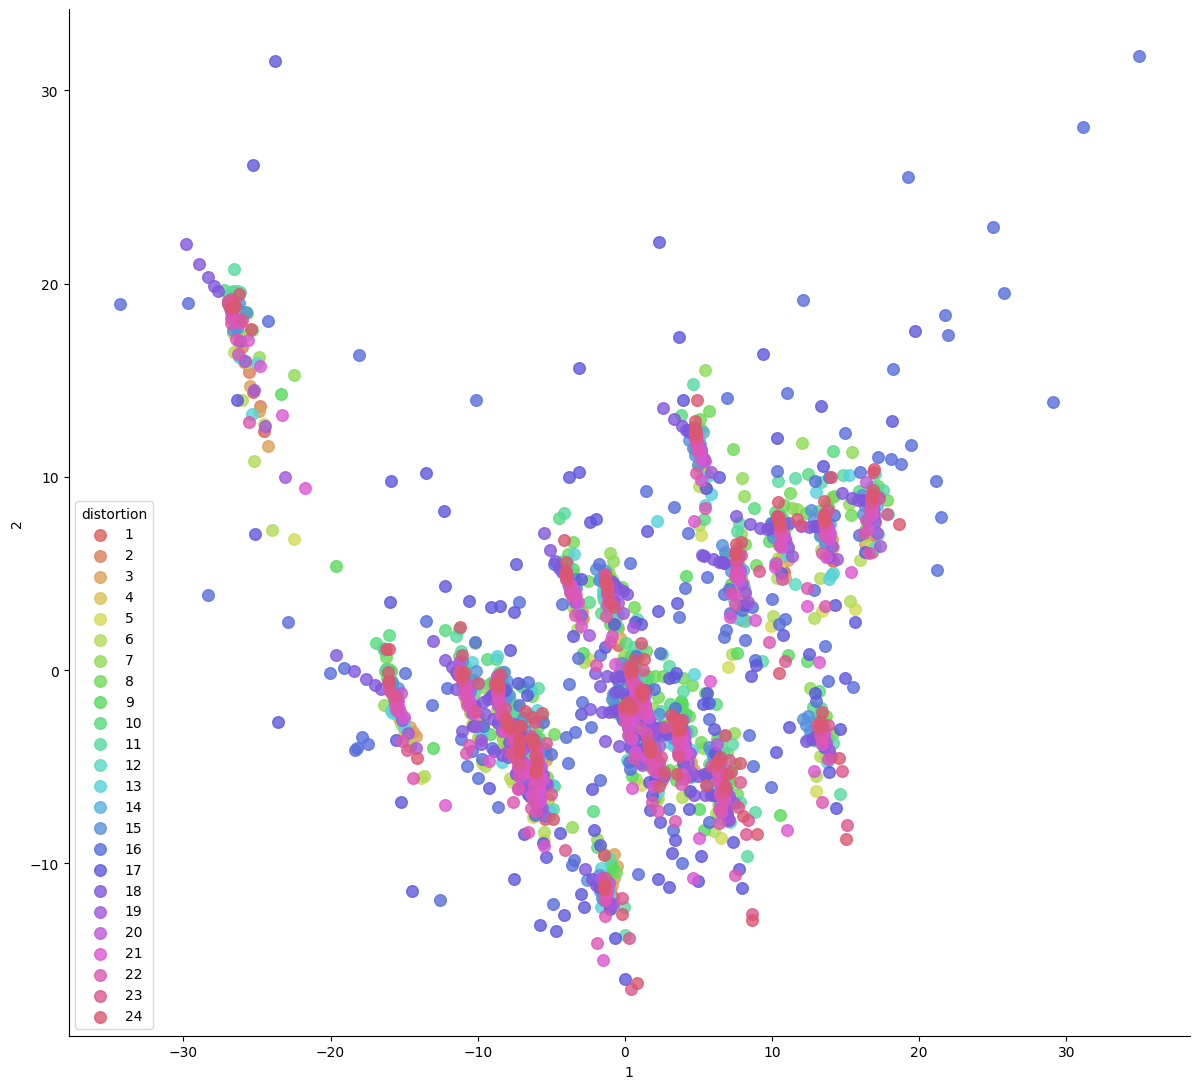

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features)

import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 



df = pd.DataFrame({'distortion':dists,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False,size= 11, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
plt.show()

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


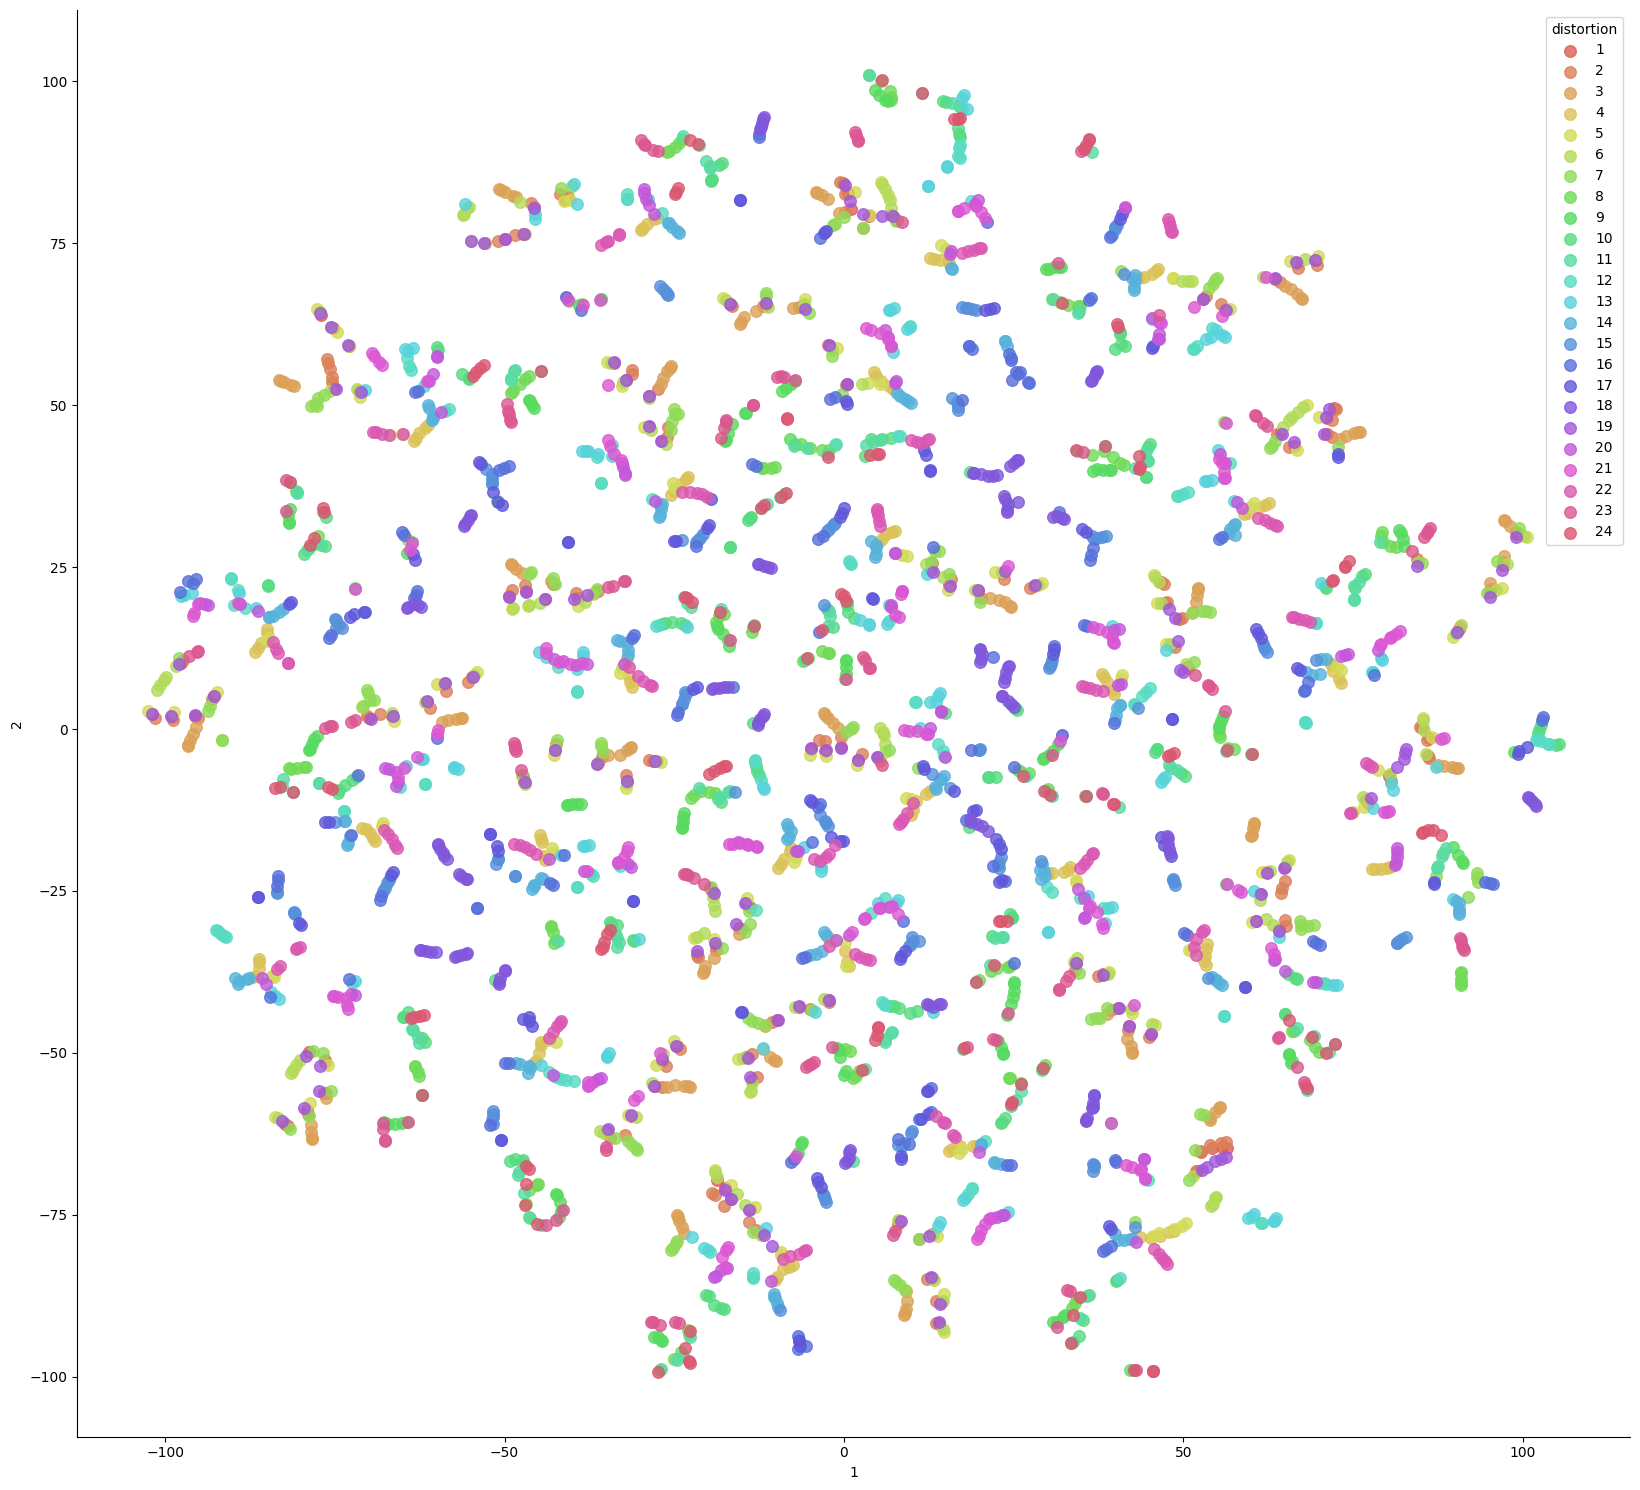

In [25]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features)

import pandas as pd
import numpy as np
import random 
from matplotlib import pyplot as plt 
import seaborn as sns 

np.random.seed(176)
random.seed(16)

df = pd.DataFrame({'distortion':dists,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='distortion',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
plt.show()

## content

In [62]:
row = 3

features1 = []
contnts = []
for c in contents:
    imgs = get_images_content(c)
    for i in range(len(imgs)):
        dd = iqa.get_DTE_features(imgs[i])[0]
        features1.append(dd)
        contnts.append(c)

  

    
    print(row)
    row +=1



features1 = np.array(features1)

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\torchvision\transforms\functional.py:423: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [63]:
features1.shape , len(contnts)

((3000, 256), 3000)

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


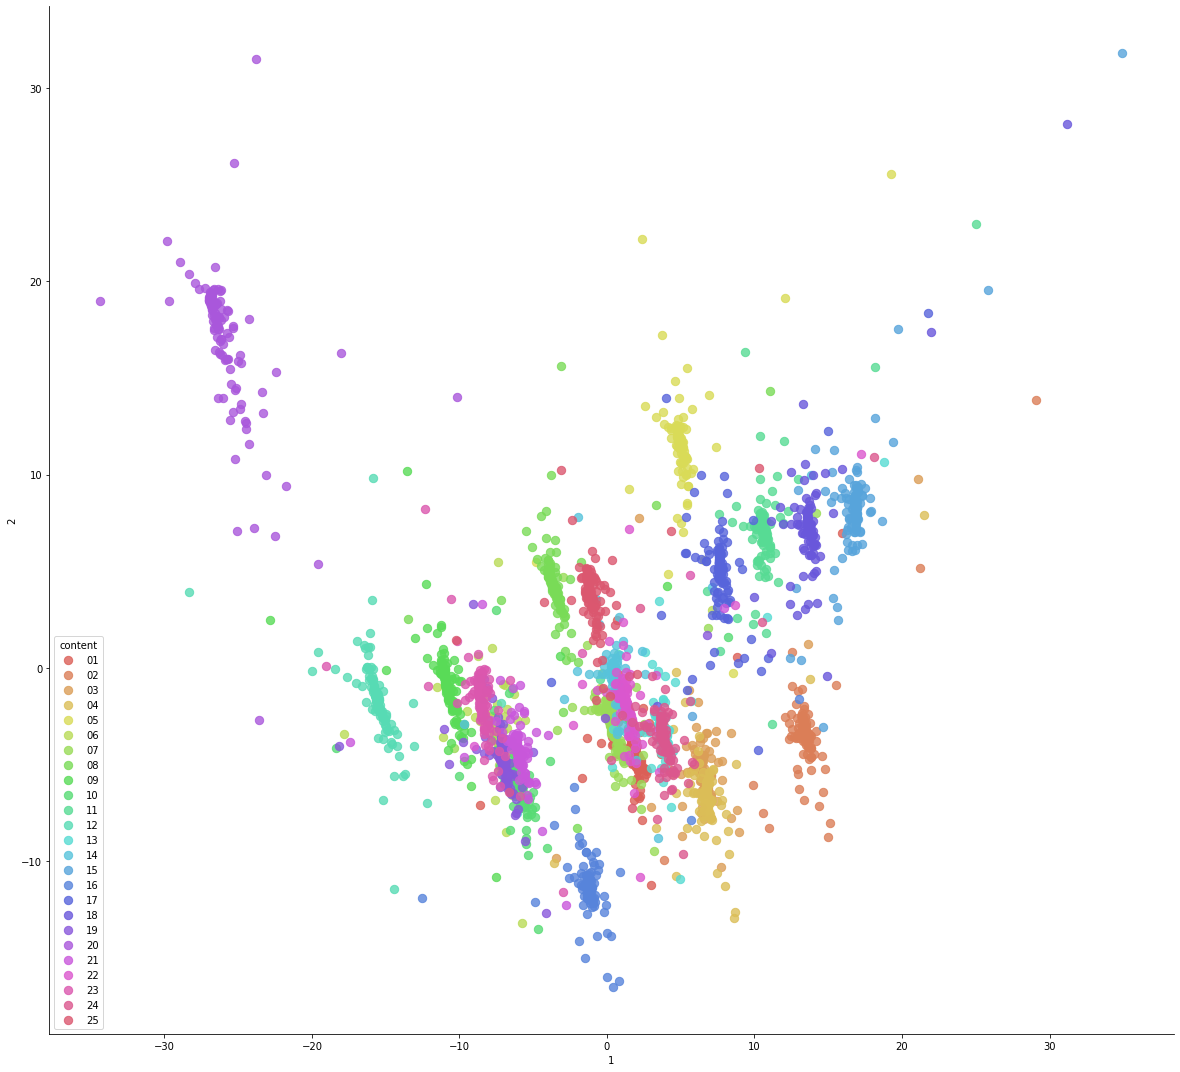

In [69]:
pca = PCA(n_components = 2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': Xt[:,0] ,
               '2': Xt[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
plt.show()

c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Farhad\anaconda3\envs\gputest\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


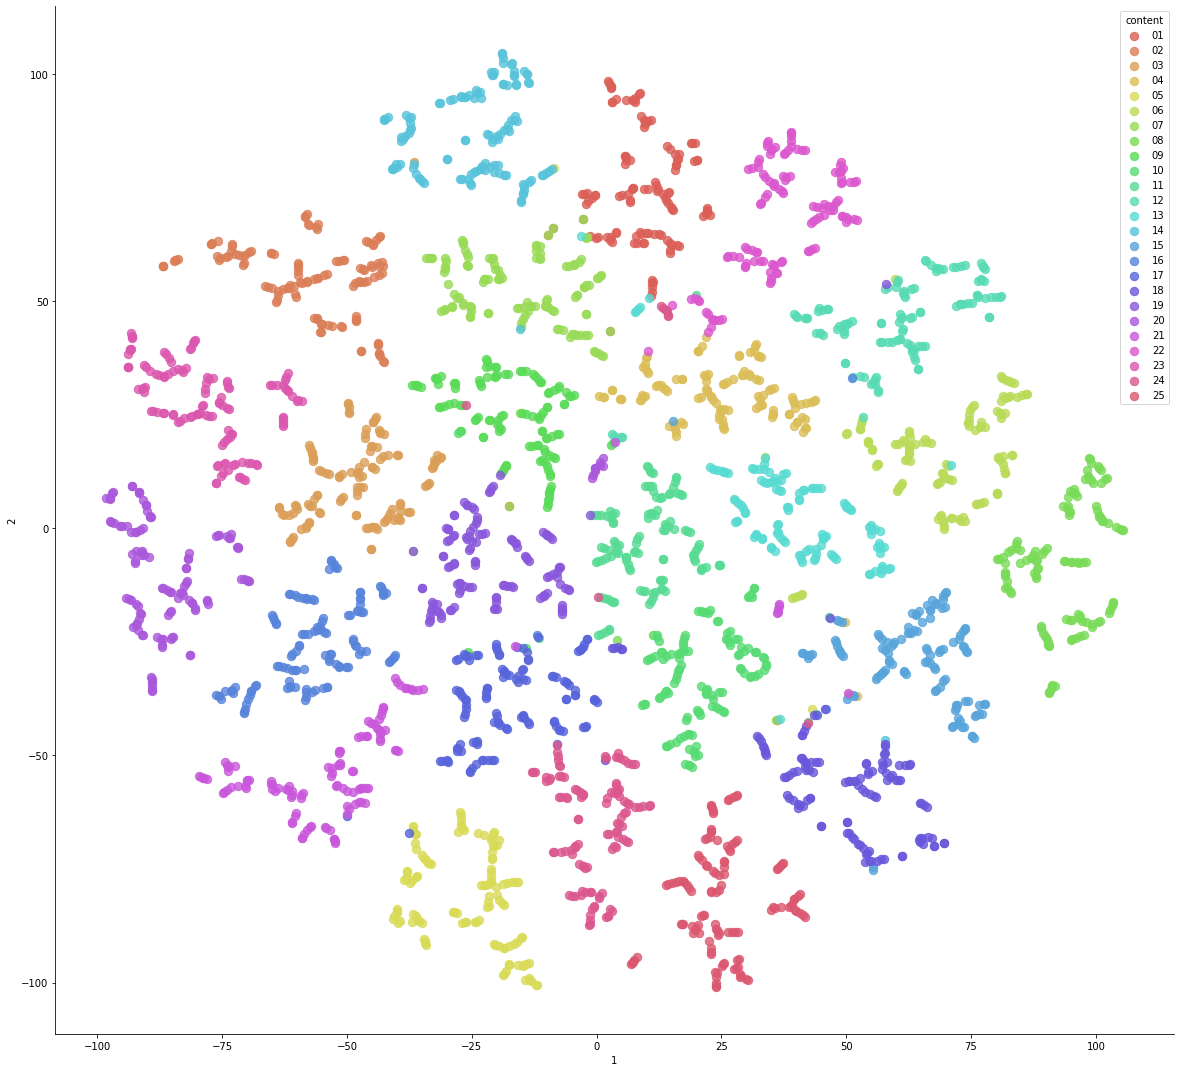

In [70]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(features1)

df = pd.DataFrame({'content':contnts,
               '1': X_embedded[:,0] ,
               '2': X_embedded[:,1],
               })

sns.lmplot(x='1' , y='2', data=df, hue='content',palette='hls', fit_reg=False,size= 15, aspect=1.1, legend_out=False,scatter_kws={"s": 70})
plt.show()